In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
cipla = pd.read_csv('CIPLA-2006-2010 - Sheet1.csv')
drl = pd.read_csv('Dr. Reddy Labs 2006-10 - Sheet1.csv')
sun = pd.read_csv('SUNPHARMA 2006-10 - Sheet1.csv')
abott = pd.read_csv('AbottUSA(2006-10) - Sheet1.csv')

In [41]:
cipla['Date'] = pd.to_datetime(cipla['Date'], infer_datetime_format=True)
cipla['Date'] = pd.to_datetime(cipla['Date']).dt.date

drl['Date'] = pd.to_datetime(drl['Date'], infer_datetime_format=True)
drl['Date'] = pd.to_datetime(drl['Date']).dt.date

sun['Date'] = pd.to_datetime(sun['Date'], infer_datetime_format=True)
sun['Date'] = pd.to_datetime(sun['Date']).dt.date

abott['Date'] = pd.to_datetime(abott['Date'], infer_datetime_format=True)
abott['Date'] = pd.to_datetime(abott['Date']).dt.date

In [42]:
cipla = cipla.set_index('Date')
drl = drl.set_index('Date')
sun = sun.set_index('Date')
abott = abott.set_index('Date')

In [43]:
cipla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,179.18,179.18,170.00,176.00,132236
2006-01-03,180.80,180.80,174.76,175.30,321341
2006-01-04,177.60,178.14,175.66,176.90,337786
2006-01-05,177.96,179.44,176.80,177.50,300820
2006-01-06,178.60,178.60,174.02,176.34,352924


In [44]:
drl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,486.00,490.00,479.98,481.50,97187
2006-01-03,486.00,499.95,483.50,496.98,378979
2006-01-04,470.78,514.50,470.78,510.23,394634
2006-01-05,500.50,517.50,500.50,514.65,256666
2006-01-06,513.50,519.95,500.58,511.90,248932


In [45]:
sun.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,67.40,68.58,67.13,68.22,71838
2006-01-03,68.70,68.70,67.50,68.20,116629
2006-01-04,68.50,69.80,67.82,68.20,219904
2006-01-05,68.70,68.70,67.13,67.57,131966
2006-01-06,68.04,68.47,67.56,67.96,121618


In [46]:
abott.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,19.95,19.98,19.60,19.78,8280500
2006-01-04,19.69,19.99,19.59,19.81,7837300
2006-01-05,19.85,20.23,19.83,20.06,5551300
2006-01-06,20.03,20.49,19.82,20.45,6587300
2006-01-09,21.25,21.38,20.84,21.21,11336000


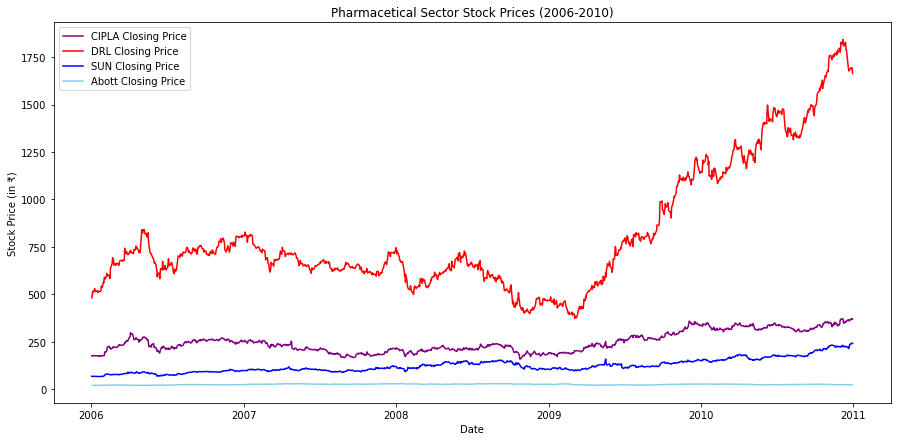

In [47]:
plt.figure(figsize=(15,7))
cipla['Close'].plot(label='CIPLA Closing Price', color = 'purple')
drl['Close'].plot(label='DRL Closing Price', color = 'red')
sun['Close'].plot(label='SUN Closing Price', color = 'blue')
abott['Close'].plot(label='Abott Closing Price', color ='skyblue')
plt.title("Pharmacetical Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in ₹)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

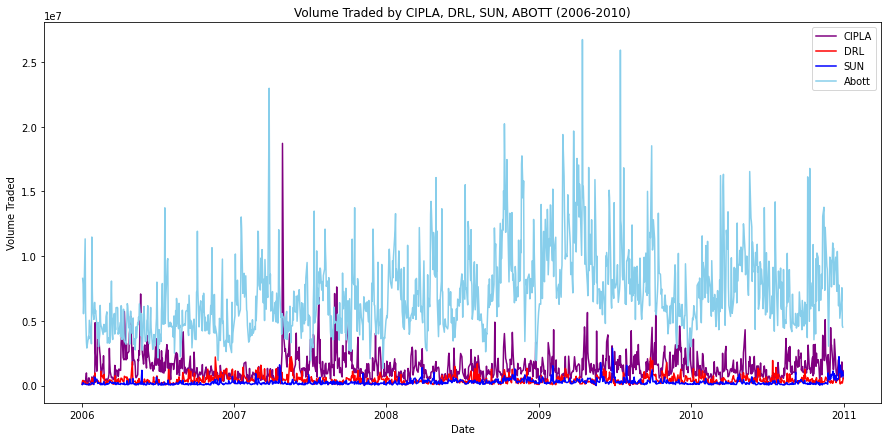

In [48]:
plt.figure(figsize=(15,7))
cipla['Volume'].plot(label='CIPLA', color = 'purple')
drl['Volume'].plot(label='DRL', color = 'red')
sun['Volume'].plot(label='SUN', color = 'blue')
abott['Volume'].plot(label='Abott', color ='skyblue')
plt.title("Volume Traded by CIPLA, DRL, SUN, ABOTT (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [51]:
abott.iloc[[abott['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-15,21.71,22.11,20.94,21.33,26746150


In [52]:
cipla.iloc[[cipla['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2007-04-27,240.0,240.0,210.0,217.1,18721012


In [53]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
cipla['Total Traded'] = cipla['Open'] * cipla['Volume']
drl['Total Traded'] = drl['Open'] * drl['Volume']
sun['Total Traded'] = sun['Open'] * sun['Volume']
abott['Total Traded'] = abott['Open'] * abott['Volume']

Text(0.5, 1.0, 'Market Capitalisation of CIPLA, DRL, SUN, ABOTT (2006-2010)')

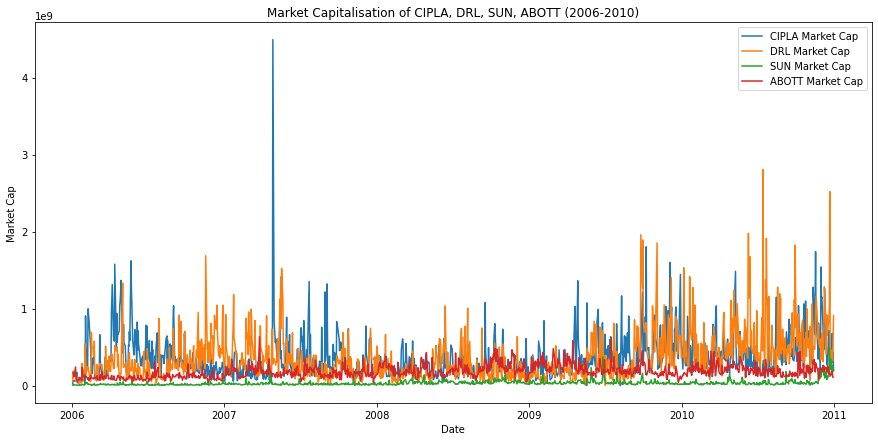

In [55]:
plt.figure(figsize = (15,7))
cipla['Total Traded'].plot(label = 'CIPLA Market Cap')
drl['Total Traded'].plot(label = 'DRL Market Cap')
sun['Total Traded'].plot(label = 'SUN Market Cap')
abott['Total Traded'].plot(label = 'ABOTT Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of CIPLA, DRL, SUN, ABOTT (2006-2010)')

In [56]:
drl.iloc[[drl['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2010-07-15,1450.0,1486.95,1448.0,1469.4,1933747,2.803933e+09


In [57]:
from pandas.plotting import scatter_matrix

In [59]:
pharma = pd.concat([cipla['Open'], drl['Open'], sun['Open'], abott['Open']], axis = 1)
pharma.columns = ['CIPLA Open', 'DRL Open', 'SUN Open', 'ABOTT Open']

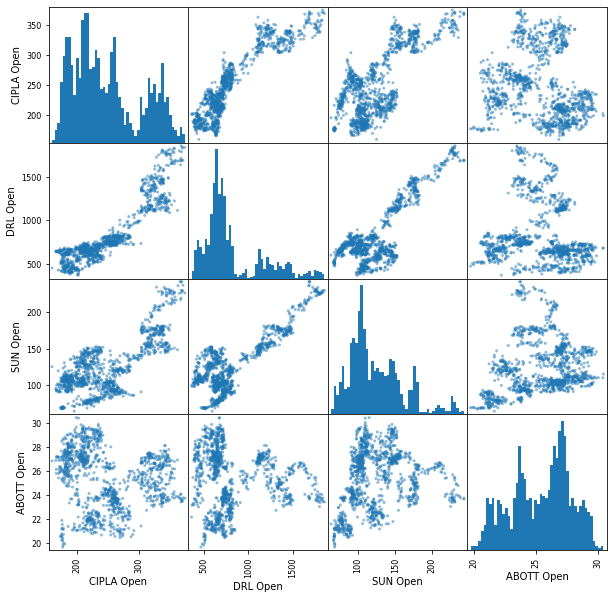

In [61]:
scatter_matrix(pharma, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [62]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
cipla['returns'] = (cipla['Close']/cipla['Close'].shift(1)) - 1
drl['returns'] = (drl['Close']/drl['Close'].shift(1)) - 1
sun['returns'] = (sun['Close']/sun['Close'].shift(1)) - 1
abott['returns'] = (abott['Close']/abott['Close'].shift(1)) - 1

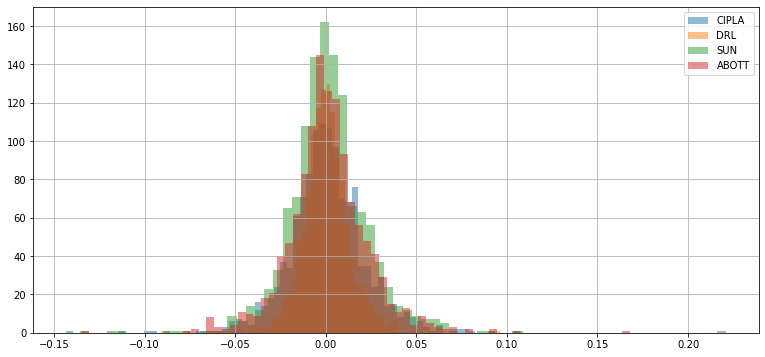

In [64]:
cipla['returns'].hist(bins = 70, label = 'CIPLA', alpha = 0.5, figsize = (13, 6))
abott['returns'].hist(bins = 70, label = 'DRL', alpha = 0.5)
sun['returns'].hist(bins = 70, label = 'SUN', alpha = 0.5)
drl['returns'].hist(bins = 70, label = 'ABOTT', alpha = 0.5)
plt.legend()

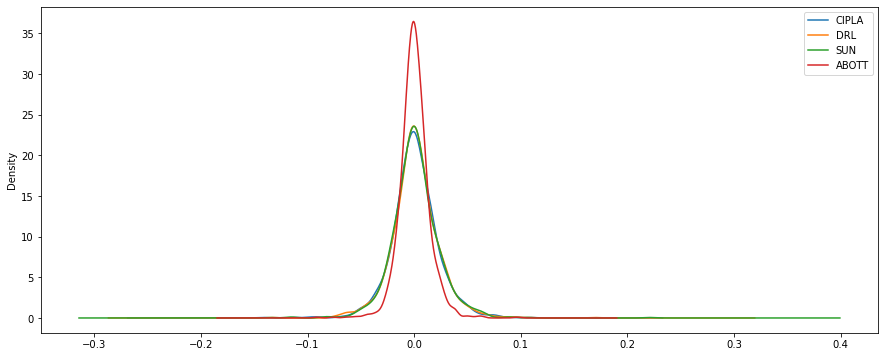

In [65]:
cipla['returns'].plot(kind='kde', label = 'CIPLA', figsize = (15, 6))
drl['returns'].plot(kind='kde', label = 'DRL')
sun['returns'].plot(kind='kde', label = 'SUN')
abott['returns'].plot(kind='kde', label = 'ABOTT')
plt.legend()

<AxesSubplot:>

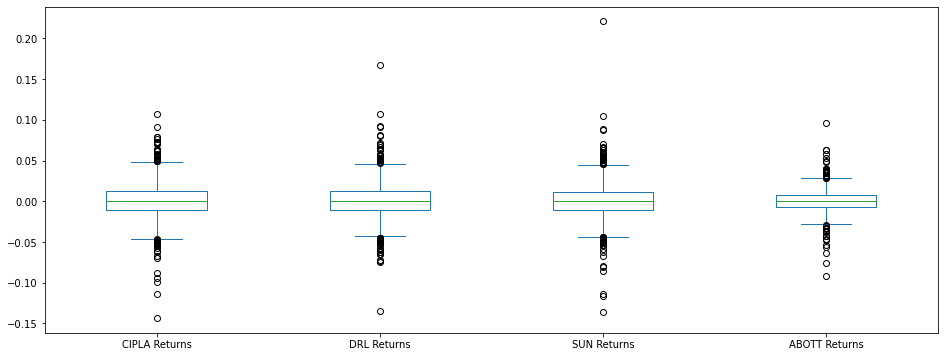

In [66]:
box_df =  pd.concat([cipla['returns'], drl['returns'], sun['returns'], abott['returns']], axis = 1)
box_df.columns = ['CIPLA Returns', 'DRL Returns', 'SUN Returns', 'ABOTT Returns']
box_df.plot(kind = 'box', figsize = (16,6))

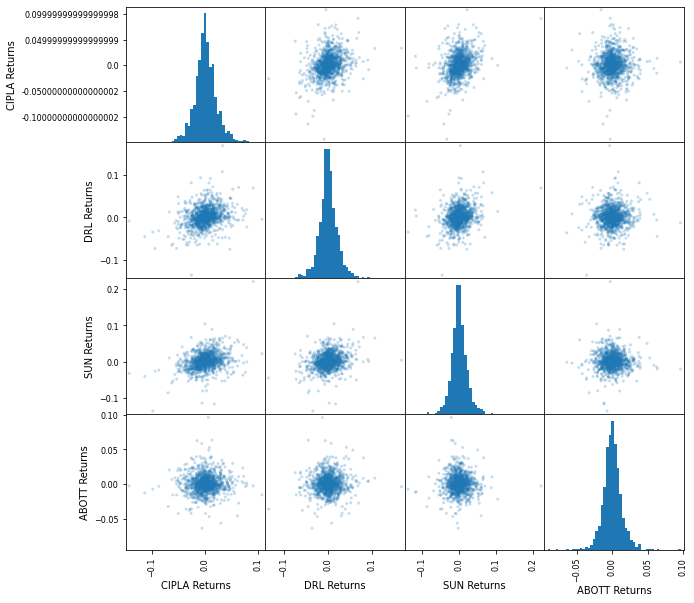

In [67]:
scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [68]:
cipla['cumulative_returns'] = (1 + cipla['returns']).cumprod()
drl['cumulative_returns'] = (1 + drl['returns']).cumprod()
sun['cumulative_returns'] = (1 + sun['returns']).cumprod()
abott['cumulative_returns'] = (1 + abott['returns']).cumprod()

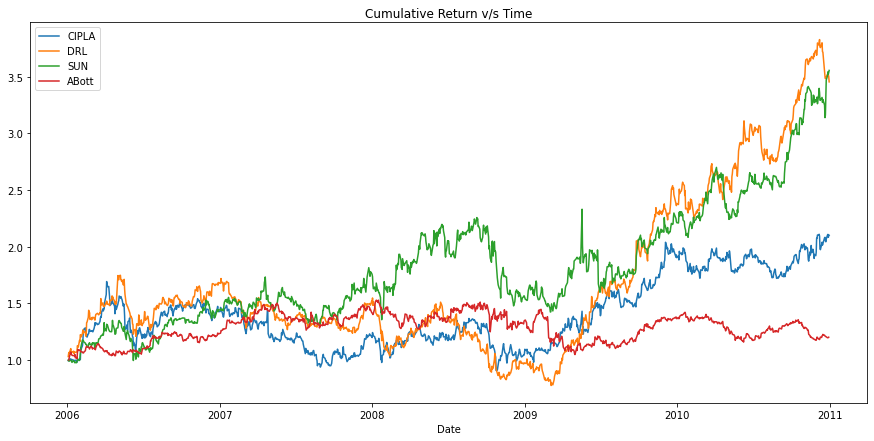

In [69]:
cipla['cumulative_returns'].plot(label='CIPLA', figsize = (15, 7))
drl['cumulative_returns'].plot(label='DRL')
sun['cumulative_returns'].plot(label='SUN')
abott['cumulative_returns'].plot(label='ABott')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()

### American Companies

In [70]:
chs = pd.read_csv("CHS.csv")
davita = pd.read_csv("DaVita-2006-10(USA) - Sheet1.csv")
tenet = pd.read_csv("TenetHealthCare-2006-10(USA) - Sheet1.csv")
uhs = pd.read_csv("UHS (USA) 2006-10 - Sheet1.csv")

In [71]:
chs['Date'] = pd.to_datetime(chs['Date'], infer_datetime_format=True)
chs['Date'] = pd.to_datetime(chs['Date']).dt.date
davita['Date'] = pd.to_datetime(davita['Date'], infer_datetime_format=True)
davita['Date'] = pd.to_datetime(davita['Date']).dt.date
tenet['Date'] = pd.to_datetime(tenet['Date'], infer_datetime_format=True)
tenet['Date'] = pd.to_datetime(tenet['Date']).dt.date
uhs['Date'] = pd.to_datetime(uhs['Date'], infer_datetime_format=True)
uhs['Date'] = pd.to_datetime(uhs['Date']).dt.date

In [72]:
chs = chs.set_index('Date')
davita = davita.set_index('Date')
tenet = tenet.set_index('Date')
uhs = uhs.set_index('Date')


In [73]:
chs.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.76,31.76,31.19,31.60,511700
2006-01-04,31.57,31.72,31.23,31.41,908000
2006-01-05,31.33,31.71,31.10,31.69,889400
2006-01-06,31.89,32.07,31.69,31.85,775300
2006-01-09,32.64,32.64,31.29,31.55,810200


In [74]:
davita.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,25.32,25.82,25.25,25.76,652100
2006-01-04,25.83,26.50,25.78,25.91,651600
2006-01-05,27.00,27.56,26.73,27.13,1600400
2006-01-06,27.30,27.95,27.21,27.70,868500
2006-01-09,27.66,27.69,27.27,27.33,602400


In [75]:
tenet.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.40,31.48,30.16,30.48,3824000
2006-01-04,30.40,31.52,30.32,31.04,3591200
2006-01-05,30.92,31.36,30.64,30.72,2310200
2006-01-06,30.76,31.12,30.63,30.96,3418400
2006-01-09,30.64,31.08,30.60,30.80,2861300


In [76]:
uhs.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,23.38,23.46,23.10,23.45,591600
2006-01-04,23.45,23.73,23.22,23.53,662100
2006-01-05,23.53,23.62,23.35,23.57,590300
2006-01-06,23.63,23.77,23.53,23.66,303000
2006-01-09,23.66,23.77,23.53,23.58,369600


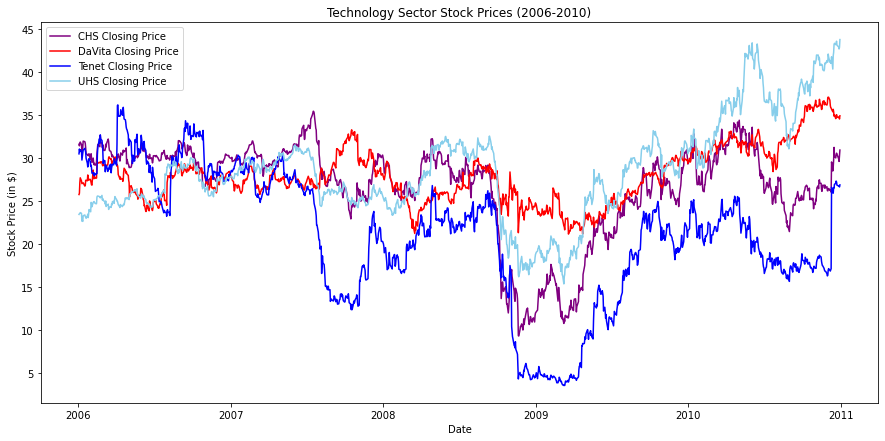

In [77]:
plt.figure(figsize=(15,7))
chs['Close'].plot(label='CHS Closing Price', color = 'purple')
davita['Close'].plot(label='DaVita Closing Price', color = 'red')
tenet['Close'].plot(label='Tenet Closing Price', color = 'blue')
uhs['Close'].plot(label='UHS Closing Price', color ='skyblue')
plt.title("Technology Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in $)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

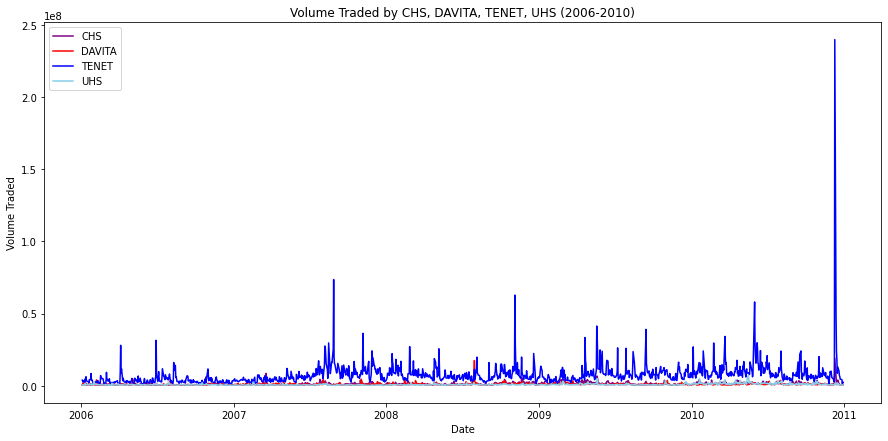

In [78]:
plt.figure(figsize=(15,7))
chs['Volume'].plot(label='CHS', color = 'purple')
davita['Volume'].plot(label='DAVITA', color = 'red')
tenet['Volume'].plot(label='TENET', color = 'blue')
uhs['Volume'].plot(label='UHS', color ='skyblue')
plt.title("Volume Traded by CHS, DAVITA, TENET, UHS (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [79]:
tenet.iloc[[tenet['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-10,25.72,27.0,25.4,26.6,239985168


In [80]:
chs['Total Traded'] = chs['Open'] * chs['Volume']
davita['Total Traded'] = davita['Open'] * davita['Volume']
tenet['Total Traded'] = tenet['Open'] * tenet['Volume']
uhs['Total Traded'] = uhs['Open'] * uhs['Volume']

Text(0.5, 1.0, 'Market Capitalisation of CHS, DAVITA, TENET, UHS(2006-2010)')

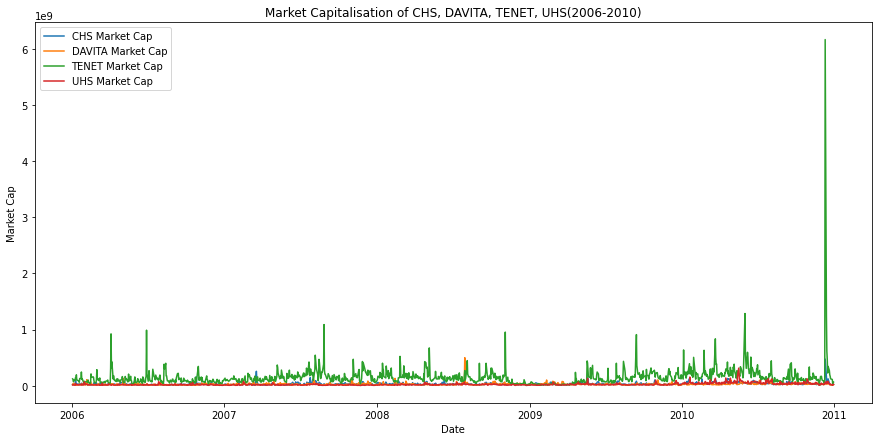

In [81]:
plt.figure(figsize = (15,7))
chs['Total Traded'].plot(label = 'CHS Market Cap')
davita['Total Traded'].plot(label = 'DAVITA Market Cap')
tenet['Total Traded'].plot(label = 'TENET Market Cap')
uhs['Total Traded'].plot(label = 'UHS Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of CHS, DAVITA, TENET, UHS(2006-2010)')

In [82]:
tenet.iloc[[tenet['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2010-12-10,25.72,27.0,25.4,26.6,239985168,6.172419e+09


In [83]:
from pandas.plotting import scatter_matrix

In [84]:
pharmaA = pd.concat([chs['Open'], davita['Open'],tenet['Open'], uhs['Open']], axis = 1)
pharmaA.columns = ['CHS Open', 'DAVITA Open', 'TENET Open', 'UHS Open']

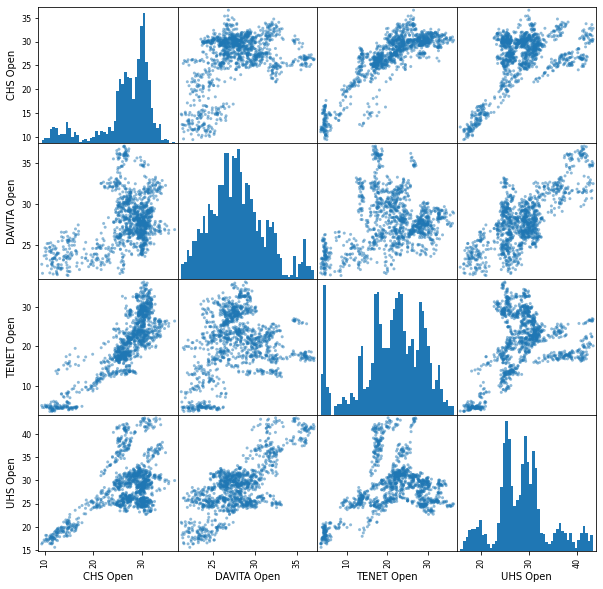

In [85]:
scatter_matrix(pharmaA, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [86]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
chs['returns'] = (chs['Close']/chs['Close'].shift(1)) - 1
davita['returns'] = (davita['Close']/davita['Close'].shift(1)) - 1
tenet['returns'] = (tenet['Close']/tenet['Close'].shift(1)) - 1
uhs['returns'] = (uhs['Close']/uhs['Close'].shift(1)) - 1

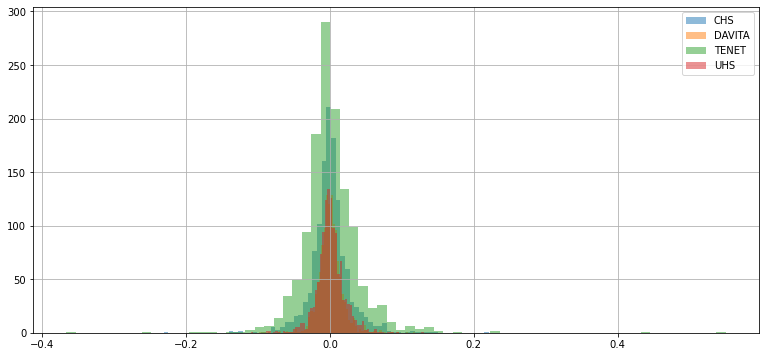

In [88]:
chs['returns'].hist(bins = 70, label = 'CHS', alpha = 0.5, figsize = (13, 6))
davita['returns'].hist(bins = 70, label = 'DAVITA', alpha = 0.5)
tenet['returns'].hist(bins = 70, label = 'TENET', alpha = 0.5)
uhs['returns'].hist(bins = 70, label = 'UHS', alpha = 0.5)
plt.legend()


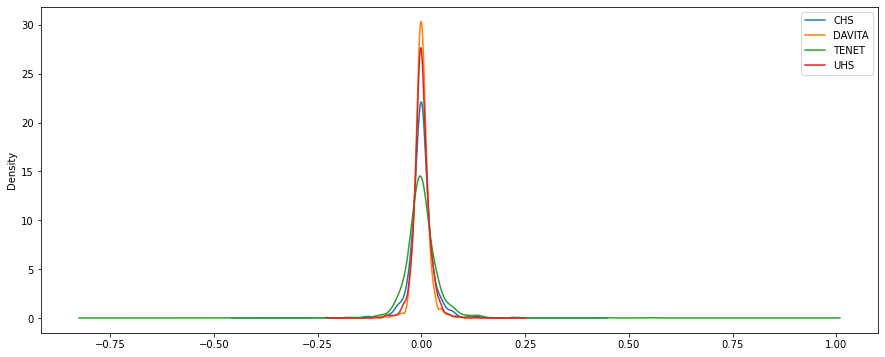

In [89]:
chs['returns'].plot(kind='kde', label = 'CHS', figsize = (15, 6))
davita['returns'].plot(kind='kde', label = 'DAVITA')
tenet['returns'].plot(kind='kde', label = 'TENET')
uhs['returns'].plot(kind='kde', label = 'UHS')
plt.legend()

<AxesSubplot:>

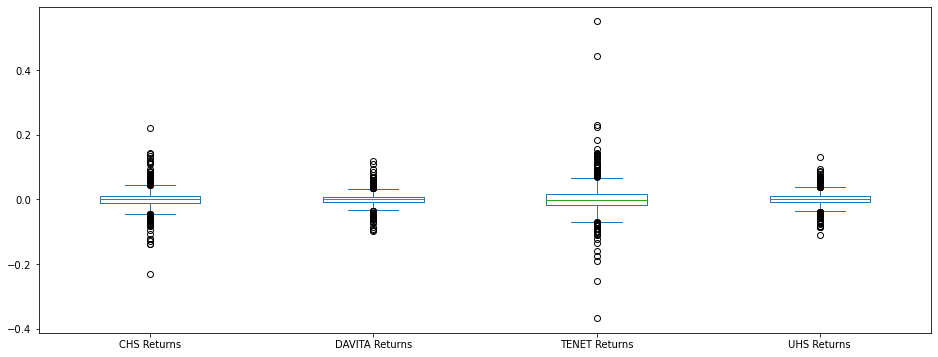

In [90]:
boxA_df = pd.concat([chs['returns'], davita['returns'], tenet['returns'], uhs['returns']], axis=1)
boxA_df.columns = ['CHS Returns', 'DAVITA Returns', 'TENET Returns', 'UHS Returns']
boxA_df.plot(kind = 'box', figsize = (16,6))


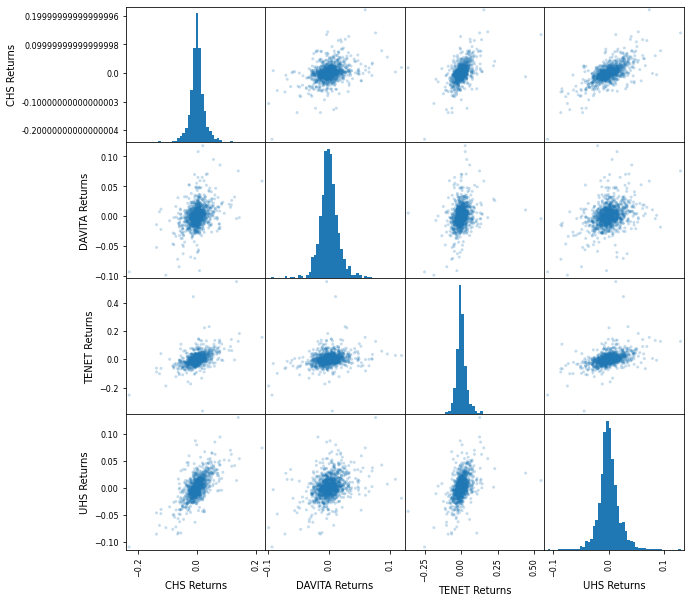

In [91]:
scatter_matrix(boxA_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [92]:
chs['cumulative_returns'] = (1 + chs['returns']).cumprod()
davita['cumulative_returns'] = (1 + davita['returns']).cumprod()
tenet['cumulative_returns'] = (1 + tenet['returns']).cumprod()
uhs['cumulative_returns'] = (1 + uhs['returns']).cumprod()


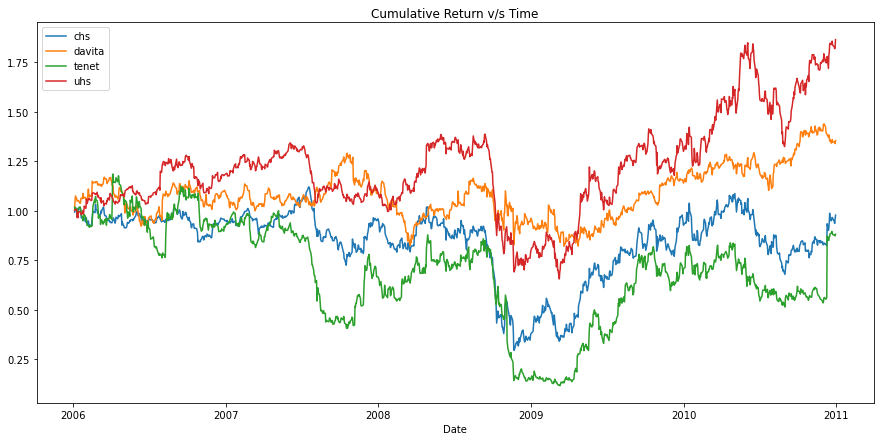

In [93]:
chs['cumulative_returns'].plot(label='chs', figsize = (15, 7))
davita['cumulative_returns'].plot(label='davita')
tenet['cumulative_returns'].plot(label='tenet')
uhs['cumulative_returns'].plot(label='uhs')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()